## Logistic Regression

### 1.1 Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2 Loading And Checking The Data

We will explore the Immunotherapy csv file. It contains numerical value columns. In the Result_of_Treatment column 1 represents a succesful treatment and 0 a failed one. We will try to classify treatments as successful or unseccessful given the other variables.

In [6]:
immunotherapy = pd.read_csv("Immunotherapy.csv")

#### Check the data using head(), info(), and describe() methods

In [7]:
immunotherapy.head()

,Sex,Age,Time,Number_of_Warts,Type,Area,Induration_Diameter,Result_of_Treatment
0,Female,22,2.25,14,3,51,50,1
1,Female,15,3.00,2,3,900,70,1
2,Female,16,10.50,2,1,100,25,1
3,Female,27,4.50,9,3,80,30,1
4,Female,20,8.00,6,1,45,8,1


In [8]:
immunotherapy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
Sex                    90 non-null object
Age                    90 non-null int64
Time                   90 non-null float64
Number_of_Warts        90 non-null int64
Type                   90 non-null int64
Area                   90 non-null int64
Induration_Diameter    90 non-null int64
Result_of_Treatment    90 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.7+ KB


In [10]:
immunotherapy.describe()

,Age,Time,Number_of_Warts,Type,Area,Induration_Diameter,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,31.044444,7.230556,6.144444,1.711111,95.700000,14.333333,0.788889
std,12.235435,3.098166,4.212238,0.824409,136.614643,17.217707,0.410383
min,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,28.500000,7.750000,6.000000,1.000000,53.000000,7.000000,1.000000
75%,41.750000,9.937500,8.750000,2.000000,80.750000,9.000000,1.000000
max,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


#### Which column has the largest variance?

### 1.3 Data Exploration And Visualization

#### Use seaborn to create a countplot to visualize Result_of_Treatment

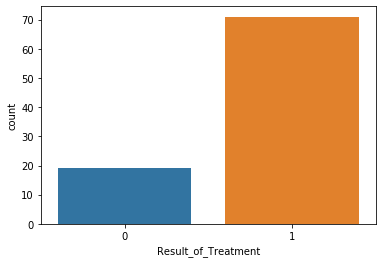

In [11]:
sns.countplot(immunotherapy['Result_of_Treatment'])

#### Create a variable sub_immunotherapy. Use immunotherapy.drop() to drop Area, Result_of_Treatment and Type columns and set axis=1.

In [15]:
sub_immunotherapy = immunotherapy.drop(columns = ['Area', 'Result_of_Treatment', 'Type'], axis=1)

#### Use seaborn to create a boxplot of sub_immunotherapy

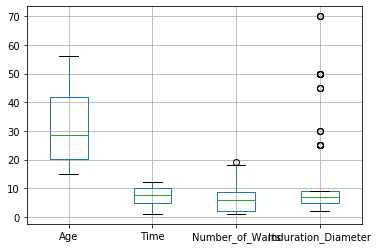

In [17]:
sub_immunotherapy.boxplot()

Which feature had the biggest median?

Which features have a symmetric distribution?

#### Visualize the distribution of gender accross different types, use seaborn swarmplot()

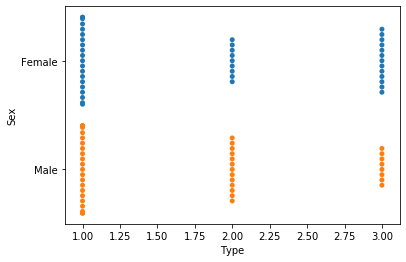

In [19]:
sns.swarmplot(x=immunotherapy['Type'], y=immunotherapy['Sex'])

### 1.4 Training And Testing Data

#### Set X equal to columns 'Age','Time','Area','Number_of_Warts','Type',and 'Induration_Diameter' and y to 'Result_of_Treatment'.

In [20]:
X = immunotherapy[['Age', 'Time', 'Area', 'Number_of_Warts', 'Type', 'Induration_Diameter']]
y = immunotherapy['Result_of_Treatment']

#### Import model_selection.train_test_split from sklearn. 

In [21]:
from sklearn.model_selection import train_test_split

#### Split the data into training set 80% and testing set 20% and set random_state = 0

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = .2, random_state = 0)

#### Import LogisticRegression from sklearn.linear_model

In [23]:
from sklearn.linear_model import LogisticRegression

#### Create an instance of a LogisticRegression() model named lr.

In [28]:
lr = LogisticRegression()
lr.fit(X, y)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Print out the coefficients of the model

In [29]:
print(lr.coef_)

[[-0.00294043 -0.18239691  0.00207601  0.01883462  0.43443917 -0.0055619 ]]


### 1.5 Predicting Test Data

#### Use lr.predict() to predict the y_test off the X_test set of data

In [30]:
prediction = lr.predict(X_test)

### 1.6 Model Evaluation

#### To evaluate the performance of our model. Use lr.score() on X_test and y_test

In [31]:
lr.score(X_test, y_test)

0.8888888888888888

#### Cross Validation

#### From sklearn.model_selection import cross_val_score  

In [33]:
from sklearn.model_selection import cross_val_score

#### The cross validation score will be the average of the scores. Print the cross validation score